`train_features.csv` - Features for the training set. Features `g-` signify gene expression data, and `c-` signify cell viability data. `cp_type` indicates samples treated with a compound (`cp_vehicle`) or with a control perturbation (`ctrl_vehicle`); control perturbations have no MoAs; `cp_time` and `cp_dose` indicate treatment duration (24, 48, 72 hours) and dose (high or low).  
`train_targets_scored.csv` - The binary MoA targets that are scored.  
`train_targets_nonscored.csv` - Additional (optional) binary MoA responses for the training data. These are not predicted nor scored.  
`test_features.csv` - Features for the test data. You must predict the probability of each scored MoA for each row in the test data.  
`sample_submission.csv` - A submission file in the correct format.

In [1]:
import pandas as pd
import glob
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
with open('train_features_0.csv', 'r') as f, open('train_features_1.csv', 'r')  as f1 :
    content = f.read()
    content1 = f1.read()
    
    obj = StringIO(content + content1)
    
train_feats_df = pd.read_csv(obj)
train_target_df = pd.read_csv("train_targets_scored.csv")

In [3]:
# with open("train_feats.csv", 'w') as f:
#     f.write(content+content1)

In [25]:
df['cp_dose'].unique()

array(['D1', 'D2'], dtype=object)

In [22]:
pd.read_csv('test_features.csv')

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,id_ff7004b87,trt_cp,24,D1,0.4571,-0.5743,3.3930,-0.6202,0.8557,1.6240,...,-1.1790,-0.6422,-0.4367,0.0159,-0.6539,-0.4791,-1.2680,-1.1280,-0.4167,-0.6600
3978,id_ff925dd0d,trt_cp,24,D1,-0.5885,-0.2548,2.5850,0.3456,0.4401,0.3107,...,0.0210,0.5780,-0.5888,0.8057,0.9312,1.2730,0.2614,-0.2790,-0.0131,-0.0934
3979,id_ffb710450,trt_cp,72,D1,-0.3985,-0.1554,0.2677,-0.6813,0.0152,0.4791,...,0.4418,0.9153,-0.1862,0.4049,0.9568,0.4666,0.0461,0.5888,-0.4205,-0.1504
3980,id_ffbb869f2,trt_cp,48,D2,-1.0960,-1.7750,-0.3977,1.0160,-1.3350,-0.2207,...,0.3079,-0.4473,-0.8192,0.7785,0.3133,0.1286,-0.2618,0.5074,0.7430,-0.0484


In [26]:
pd.read_csv('sample_submission.csv')

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,id_001897cda,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,id_002429b5b,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,id_00276f245,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,id_0027f1083,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,id_ff7004b87,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3978,id_ff925dd0d,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3979,id_ffb710450,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3980,id_ffbb869f2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [28]:
pd.read_csv('train_targets_scored.csv')

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_feats_df.columns

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

In [14]:
df_for_finding_unique = train_target_df[train_feats_df['cp_dose'] == 'D2']

In [19]:
for column in df_for_finding_unique.columns:
    if len(df_for_finding_unique[column].unique()) == 1:
        print(column)

atp-sensitive_potassium_channel_antagonist
erbb2_inhibitor


In [20]:
train_target    

Index(['sig_id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=207)

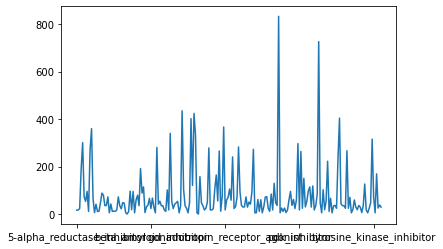

In [32]:
train_target_df.sum(axis = 0).iloc[1:].plot()

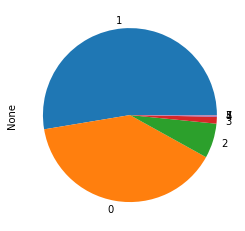

In [39]:
train_target_df.sum(axis = 1).value_counts().plot.pie()

In [40]:
train_feats_df.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [54]:
train_target_df[train_feats_df['cp_type'] == 'ctl_vehicle'].sum(axis = 0)[1:].unique()

array([0], dtype=object)

In [65]:
(train_target_df[train_feats_df['cp_type'] == 'ctl_vehicle'].iloc[:,1:].values == 0).all()

True

In [66]:
train_feats_df['cp_time'].value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

In [67]:
train_feats_df['cp_dose'].value_counts()

D1    12147
D2    11667
Name: cp_dose, dtype: int64

In [72]:
(train_feats_df['cp_time'].astype("str") + train_feats_df['cp_dose']).value_counts()

48D1    4354
72D1    3907
48D2    3896
24D1    3886
24D2    3886
72D2    3885
dtype: int64

In [6]:
train_feats_df1 = train_feats_df[train_feats_df['cp_type'] == 'trt_cp']

In [76]:
(train_feats_df1['cp_time'].astype("str") + train_feats_df1['cp_dose']).value_counts()

48D1    4011
72D1    3600
48D2    3591
24D1    3585
24D2    3581
72D2    3580
dtype: int64

In [78]:
train_feats_df1.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [7]:
ind = (train_feats_df1['cp_time'] == 24)  & (train_feats_df1['cp_dose'] == 'D1')
train_feats_df1[ind]

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
5,id_001762a82,trt_cp,24,D1,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,...,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990
36,id_00762e877,trt_cp,24,D1,-0.4026,0.1662,-0.6307,-0.4438,-0.5992,-0.2523,...,-0.6357,-0.1639,-0.0852,0.1438,0.0083,0.7504,0.5418,0.8407,0.3193,0.4817
39,id_0079d45d3,trt_cp,24,D1,1.6310,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,...,-2.9240,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461
48,id_008b48693,trt_cp,24,D1,2.5200,-2.0200,1.1710,2.0420,-1.8070,0.5109,...,-0.6200,0.0071,-0.3901,0.5272,-1.0650,0.0289,-0.2725,-0.1511,-0.4635,-0.1365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23787,id_ffcb7e365,trt_cp,24,D1,-0.4514,0.9855,0.1999,0.0401,-0.9224,0.3546,...,0.0088,0.2574,-0.2633,-0.2566,0.5811,0.7846,0.6259,0.8588,0.1258,0.4556
23796,id_ffe18c87f,trt_cp,24,D1,-0.2641,1.0200,1.6390,-0.6252,-0.5678,-0.3789,...,0.2650,-0.5001,-0.3407,-1.2700,-0.4760,0.3601,-0.4029,-0.9694,-0.2315,-0.8074
23802,id_fff3976bd,trt_cp,24,D1,3.2890,2.1270,0.9770,2.0490,2.3170,-0.5355,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23804,id_fff506720,trt_cp,24,D1,-1.0140,0.1709,-0.4291,1.8750,0.9859,0.3009,...,-0.6730,0.3175,-1.5510,-1.2800,-0.7632,-0.6736,-0.4097,0.2282,-0.3213,-0.0836


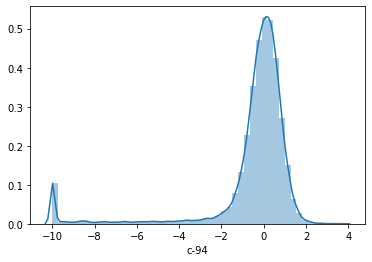

In [42]:
import seaborn as sns

sns.distplot(train_feats_df.loc[:, 'c-94'])

In [5]:
train_target_df.loc[:,'5-alpha_reductase_inhibitor']

0        0
1        0
2        0
3        0
4        0
        ..
23809    0
23810    0
23811    0
23812    0
23813    0
Name: 5-alpha_reductase_inhibitor, Length: 23814, dtype: int64

In [50]:
train_feats_df.values

array([['id_000644bb2', 'trt_cp', 24, ..., 0.2139, 0.3801, 0.4176],
       ['id_000779bfc', 'trt_cp', 72, ..., 0.1241, 0.6077, 0.7371],
       ['id_000a6266a', 'trt_cp', 48, ..., -0.2187, -1.408, 0.6931],
       ...,
       ['id_fffc1c3f4', 'ctl_vehicle', 48, ..., 0.7592, 0.6656, 0.3808],
       ['id_fffcb9e7c', 'trt_cp', 24, ..., 0.7015, -0.629, 0.074],
       ['id_ffffdd77b', 'trt_cp', 72, ..., -0.4775, -2.15, -4.252]],
      dtype=object)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
import pickle
from sklearn.utils import resample
from sklearn.model_selection import train_test_split


# filter_ind = train_feats_df['cp_type'] == 'trt_cp'

# train_feats_df1 = train_feats_df[filter_ind]

# train_target_df1 = train_target_df[filter_ind]

clf_dict = {}

X_train, X_test, y_train, y_test = train_test_split(train_feats_df.values, train_target_df.values, test_size=0.2,)




for combination in tqdm([(24, 'D1'), (48, 'D1'), (72, 'D1'), (24, 'D2'), (48, 'D2'), (72, 'D2')]):
    label_clfs_container = []
    for i, label in enumerate(train_target_df.iloc[:,1:].columns):
        
    
        ind = (X_train[:, 2] == combination[0])  & (X_train[:, 3] == combination[1]) &  (X_train[:, 1] == 'trt_cp')



        feature_mat = X_train[ind][:, 4:]

        target_vector = y_train[ind][:, i]
        
        if (target_vector == 1).any():
            assert  (target_vector == 1).sum() < (target_vector == 0).sum()
            
            
            idx_of_label_one = target_vector == 1
            idx_of_label_zero = target_vector == 0
            
            num_sample_0 = (target_vector == 0).sum()
            
            
            
            resampled_one_feat, resampled_one_target = \
                     resample(feature_mat[idx_of_label_one] , target_vector[idx_of_label_one], n_samples =num_sample_0)
            
            final_feat = np.append(feature_mat[idx_of_label_zero], resampled_one_feat, axis = 0)
            
            final_target = np.append(target_vector[idx_of_label_zero], resampled_one_target, axis = 0)
            clf = LogisticRegression(max_iter =1000)
            clf.fit(final_feat.astype('float32'), final_target.astype('int'))
            
            label_clfs_container.append(clf)
            
            # up sampling
            
            
            
        else:
            label_clfs_container.append(0)
        
    clf_dict[combination] = label_clfs_container
        
        

#         clf =  MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3), n_jobs = 2).fit(feature_mat,target_mat )

    
#     with open(repr(combination) + '.pkl', "wb") as f:
#         pickle.dump(clf, f)
        
    
#     clf =  DecisionTreeClassifier(random_state=0).fit(feature_mat, target_mat)
#     clf = LogisticRegression(random_state=0).fit(feature_mat, target_mat)
    
    
    

100%|██████████| 6/6 [29:12<00:00, 292.12s/it]


In [7]:
final_target.astype(int)

array([0, 0, 0, ..., 1, 1, 1])

In [57]:
y_train

array([['id_71d812812', 0, 0, ..., 0, 0, 0],
       ['id_335953d26', 0, 0, ..., 0, 0, 0],
       ['id_899d95553', 0, 0, ..., 0, 0, 0],
       ...,
       ['id_4991bc459', 0, 0, ..., 0, 0, 0],
       ['id_8693c679b', 0, 0, ..., 0, 0, 0],
       ['id_0b30bd23d', 0, 0, ..., 0, 0, 0]], dtype=object)

In [12]:
y_test[:, 1:].shape

(4763, 206)

In [29]:
with open('logisticregression.pkl', 'wb') as f:
    pickle.dump(clf_dict, f)

In [12]:
from sklearn.utils import resample
resample(feature_mat , target_vector, n_samples =999)

[array([[-0.4504,  0.7535, -0.5116, ..., -0.5038, -0.666 , -0.7433],
        [ 0.2162, -0.8902,  0.5016, ...,  0.6936,  0.7999,  0.9352],
        [-1.365 ,  0.3016, -0.7075, ...,  0.1399,  1.12  ,  1.3   ],
        ...,
        [-0.0921, -0.684 , -0.0192, ..., -0.6138, -0.2629,  0.1091],
        [ 0.1218, -0.5421, -0.1224, ...,  0.1905,  0.411 ,  0.5976],
        [-0.4191, -0.2503,  1.576 , ...,  0.3629,  0.3017,  0.5985]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [3]:
clf_dict[(24, 'D1')].predict_proba

<bound method MultiOutputClassifier._predict_proba of MultiOutputClassifier(estimator=GaussianNB(), n_jobs=10)>

In [14]:
pred = np.zeros(y_test[:, 1:].shape)
for combination in tqdm([(24, 'D1'), (48, 'D1'), (72, 'D1'), (24, 'D2'), (48, 'D2'), (72, 'D2')]):
    
    temp_result = [ ]
    
    idx = (X_test[:, 2] == combination[0])  & (X_test[:, 3] == combination[1]) &  (X_test[:, 1] == 'trt_cp')
    test_feat_mat = X_test[idx][:, 4:]
    for classifier in clf_dict[combination]:
        if classifier != 0:
            assert classifier.classes_[0] == 0

            pred_prob = classifier.predict_proba(test_feat_mat)[:, 1]
            
            temp_result.append(pred_prob)
        else:
            temp_result.append([0] * sum(idx))
            
    temp_result = np.array(temp_result).T
    
    pred[idx] = temp_result


        

#         clf_i = clf_dict[combination]


#         final_prob_list = []
#         for clses, prob in zip(clf_i.classes_, clf_i.predict_proba(feature_mat)):
#             assert clses[0] == 0
#             final_prob_list.append(prob[:, 0])

#         final_prob_list = (1 - np.array(final_prob_list)).T

#     temp= clf_dict[combination]
    

100%|██████████| 6/6 [01:05<00:00, 10.96s/it]


In [15]:
pred.shape


(4763, 206)

In [44]:
(pred == 1).any()

True

In [17]:
y_test.shape

(4763, 207)

In [18]:
pred[pred < 1e-15] = 1e-15

In [57]:
train_target_df.iloc[:, 1:].values.shape

(23814, 206)

In [19]:
pred[pred == 1] = 1 - 1e-15 

In [21]:
def evaluation(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean(axis = 0).mean()

In [49]:
evaluation(train_target_df.iloc[:, 1:].values, pred)

0.0002135435284081923

In [22]:
evaluation(y_test[:, 1:], pred)

0.05882718480247713

In [80]:
train_target_df.iloc[:, 1:].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
final_prob_list.shape

(203, 3580)

In [48]:
train_target_df

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
clf = clf_dict[(24, 'D1')]

final_prob_list = []
for clses, prob in zip(clf.classes_, temp):
    final_prob_list.append(prob[:, 0])

In [36]:
np.array(final_prob_list)

array([[1.00000000e+000, 1.19873927e-099, 1.00000000e+000, ...,
        1.00250079e-101, 1.65119674e-088, 2.28177516e-078],
       [7.87931828e-001, 3.14309099e-089, 1.00000000e+000, ...,
        1.76786552e-105, 2.72756045e-101, 3.83552084e-079],
       [1.00000000e+000, 1.63034730e-060, 1.00000000e+000, ...,
        3.78909484e-090, 2.69589320e-040, 2.86108110e-007],
       ...,
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 9.94145157e-001, 1.00000000e+000, ...,
        1.10805403e-009, 1.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000]])

In [16]:
import numpy as np
np.zeros(train_target_df.iloc[:,1: ].values.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
# import pickle
# with open("DecisionTreeClassifier.pkl", 'wb') as f:
#     pickle.dump( clf_dict, f)

In [32]:
target_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

----------------

## pyspark

In [ ]:
train_feats_df['cp_dose']

In [58]:
from pyspark.sql import Row
from pyspark import SparkConf, SparkContext, SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.types import FloatType
from pyspark.sql.types import DoubleType
from pyspark.sql.types import IntegerType

from pyspark.sql.functions import udf
from pyspark.sql import functions as F 
from pyspark.sql.functions import explode, col, udf, mean as _mean, stddev as _stddev, log, log10
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.functions import lit

from pyspark.ml.feature import StringIndexer

from pyspark.ml.feature import VectorAssembler


In [4]:
# sc = SparkContext()
sc.stop()  # must stop the current spark context before starting the new sparkcontxt


In [5]:
config = SparkConf().setAll([('spark.executor.memory', '12g'), ('spark.executor.cores', '5'), ('spark.cores.max', '7'), ('spark.driver.memory','8g')])
config.setAppName("MIE Lecture 5")
config.set("spark.dynamicAllocation.minExecutors", "4");
config.set("spark.dynamicAllocation.maxExecutors", "8");
config.set("spark.dynamicAllocation.initialExecutors", "6"); # the number must be between the min and max
sc = SparkContext(conf=config)  # start a new sc with the current config
spark = SparkSession(sc)
sqlc=SQLContext(sc)
print(sc.getConf().getAll())  # print all the configuration

[('spark.dynamicAllocation.minExecutors', '4'), ('spark.executor.cores', '5'), ('spark.executor.id', 'driver'), ('spark.driver.port', '63990'), ('spark.driver.host', '100.65.107.39'), ('spark.dynamicAllocation.initialExecutors', '6'), ('spark.executor.memory', '12g'), ('spark.cores.max', '7'), ('spark.app.id', 'local-1603989673479'), ('spark.rdd.compress', 'True'), ('spark.driver.memory', '8g'), ('spark.serializer.objectStreamReset', '100'), ('spark.master', 'local[*]'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.dynamicAllocation.maxExecutors', '8'), ('spark.ui.showConsoleProgress', 'true'), ('spark.app.name', 'MIE Lecture 5')]


In [70]:
# trainSchema = StructType([
#   StructField("g-*", DoubleType()),
#   StructField("c-*", DoubleType()),
# #   StructField("bytes_served", DoubleType()) ]
# ])
train = spark.read.csv('train_feats.csv', header='true', inferSchema= 'true')   # path in HDFS file system

train_labels =  spark.read.csv('train_targets_scored.csv', header='true', inferSchema='true' ) 






train.registerTempTable('train')


# type_list = [
#         StructField("sig_id", StringType()),
#         StructField("cp_type", StringType()),
#         StructField("cp_time", IntegerType()),
#         StructField("cp_dose", StringType()),
# ]
# for i in range(772):
#     type_list.append(StructField(f"g-{i}", FloatType()))
# for i in range(100):
#     type_list.append(StructField(f"c-{i}", FloatType()))

# trainSchema = StructType(type_list)
    
# train = spark.read.csv('train_feats.csv', header='true', schema = trainSchema)   # path in HDFS file system
indexer = StringIndexer().setInputCols(["cp_dose", "cp_type"]).setOutputCols(["cp_dose_index", "cp_type_index"])
# indexer2 = StringIndexer().setInputCol("cp_type").setOutputCol("cp_type_index")
train = indexer.fit(train).transform(train)
# indexer.transform(train)
columns_drop = ["cp_dose", "cp_type"]
train = train.drop(*columns_drop)

input_columns = [ "cp_type_index", "cp_time", "cp_dose_index" ] + [f"g-{i}" for i in range(772)] + [f"c-{i}" for i in range(100)]

vectorAssembler = VectorAssembler(inputCols =input_columns, outputCol = 'feats' )
train = vectorAssembler.transform(train)




left_join = train.join(train_labels, train.sig_id == train_labels.sig_id, how = 'left')

final_train = left_join.select(['feats', 'angiogenesis_inhibitor'])

# spark.read.options(Map("inferSchema"->"true","delimiter"->","))
#   .csv("src/main/resources/zipcodes.csv"

In [71]:
final_train.printSchema()

root
 |-- feats: vector (nullable = true)
 |-- angiogenesis_inhibitor: integer (nullable = true)



In [81]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol = 'feats', labelCol='angiogenesis_inhibitor')
lrModel = lr.fit(final_train)
trainingSummary = lrModel.summary
# print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.precisionByLabel)

AttributeError: 'BinaryLogisticRegressionTrainingSummary' object has no attribute 'r2'

In [84]:
trainingSummary.precisionByLabel

[0.99848828420257, 0.0]

In [19]:
train = spark.read.csv('train_feats.csv', header='true', )   # path in HDFS file system


In [ ]:
train.printSchema()

In [57]:
train.toPandas()

,sig_id,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,cp_dose_index,cp_type_index
0,id_000644bb2,24,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0.0,0.0
1,id_000779bfc,72,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0.0,0.0
2,id_000a6266a,48,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0.0,0.0
3,id_0015fd391,48,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0.0,0.0
4,id_001626bd3,72,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,24,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,1.0,0.0
23810,id_fffb70c0c,24,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1.0,0.0
23811,id_fffc1c3f4,48,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,1.0,1.0
23812,id_fffcb9e7c,24,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,0.0,0.0


## SCRAP

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
X, y = load_breast_cancer(return_X_y=True)

In [22]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [24]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

X, y = make_multilabel_classification(n_classes=3, random_state=0)
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, y)
clf.predict(X[-2:])


array([[1, 1, 0],
       [1, 1, 1]])

In [28]:
clf.predict_proba

<bound method MultiOutputClassifier._predict_proba of MultiOutputClassifier(estimator=KNeighborsClassifier())>

In [30]:
y

array([[0, 1, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 1, 1],
       [0, 0, 1],
       [1, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 1, 0],
       [0, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [1, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       [0, 1, 1],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0,